# Pendel

Betrachtet wird folgendes Pendel

![Pendel](Pendel.png)

Simulieren Sie den zeitlichen Verlauf des Auslenkungswinkels $\varphi(t)$ zwischen $t = 0$ und $t = 40$. Die mathematische Modellierung des Pendels lautet:

Normalkraft:
$$F_n(t) = m \cdot g \cdot \sin(\varphi(t))$$

Reibungskraft
$$F_R(t) = -\frac{2}{\pi} \cdot F_{R,0} \cdot \arctan(10 \cdot \dot{\varphi}(t))$$

Beschleunigung
$$a(t) = -l \cdot \ddot{\varphi}(t)$$

Externer Antrieb:
$$F_A(t) = 20 \text{ N} \cdot \sin(2\pi \cdot 0.2 \text{ Hz} \cdot t)$$

Kräftegleichgewicht
$$m \cdot a(t) = F_n(t) - F_R(t) + F_A(t)$$

Zu Beginn ist das Pendel mit $\varphi(t = 0) = 15°$ ausgelenkt und befindet sich in Ruhe.

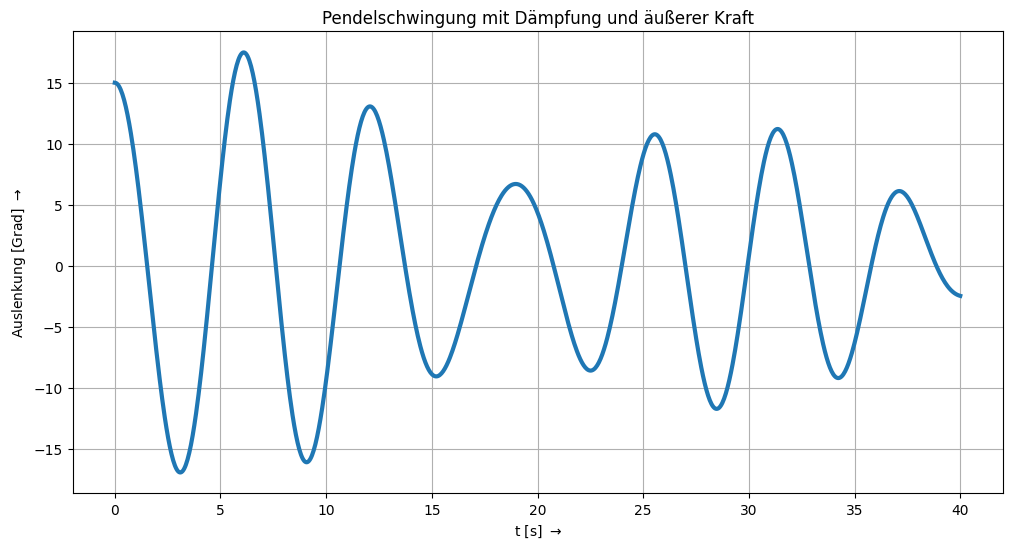

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

def xpunkt_pendel(t, x, m, l, g, FR0):
    """
    Differentialgleichung für ein gedämpftes Pendel mit äußerer Kraft
    
    Parameter:
    x[0] = phi (Auslenkungswinkel)
    x[1] = phi_punkt (Winkelgeschwindigkeit)
    """
    phi = x[0]
    phi_punkt = x[1]
    
    Fn = m * g * np.sin(phi)           # Rückstellkraft
    FR = -2/np.pi * FR0 * np.arctan(10 * phi_punkt)  # Reibungskraft
    FA = 20 * np.sin(2 * np.pi * 0.2 * t)  # Äußere Kraft
    
    phi_2punkt = -(Fn - FR + FA) / (l * m)  # Winkelbeschleunigung
    
    return [phi_punkt, phi_2punkt]

# Parameter
m = 50        # Masse in kg
l = 10        # Pendellänge in m
g = 9.81      # Erdbeschleunigung in m/s²
FR0 = 6       # Reibungskoeffizient

# Numerische Lösung
solution = solve_ivp(
    lambda t, x: xpunkt_pendel(t, x, m, l, g, FR0),
    [0, 40],           # Zeitintervall
    [15/360*2*np.pi, 0],  # Anfangswerte: phi=15°, phi_punkt=0
    method='RK45',
    rtol=1e-8,
    atol=1e-10,
    dense_output=True
)

# Gleichmäßiges Zeitraster für glatte Kurven
t = np.linspace(0, 40, 1000)
x = solution.sol(t)
phi_rad = x[0]
phi_grad = phi_rad * 180/np.pi  # Umrechnung in Grad

# Grafische Darstellung
plt.figure(figsize=(12, 6))
plt.plot(t, phi_grad, linewidth=3)
plt.xlabel('t [s] $\\rightarrow$')
plt.ylabel('Auslenkung [Grad] $\\rightarrow$')
plt.grid(True)
plt.title('Pendelschwingung mit Dämpfung und äußerer Kraft')
plt.show()